In [1]:
#importing dependencies

import requests
import json
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from pprint import pprint
import pandas as pd
from config import api_key
from random import uniform
from datetime import date

In [ ]:
# creating cities list
cities = []

#Generating random latitudes and longitudes
latitude = np.random.uniform(low=-90.000, high=90.000, size=1800)
longitude = np.random.uniform(low=-180.000, high=180.000, size=1800)

#Creating for loop to find cities from citipy using the randomly generated lat-long
for x in range(len(latitude)):
    city = citipy.nearest_city(latitude[x], longitude[x])
       
   #getting city names and country from citipy
    city_name = city.city_name + "," + city.country_code
    
    #Adding city names to the empty list
    cities.append(city_name)
    
#filtering out only the unique cities name from the list
unique_cities = set(cities)   


In [ ]:
#Defining base url
base_url = "https://api.openweathermap.org/data/2.5/weather?"

#Creating an empty list for each of the parameters
city_temperature = []
city_cloudiness = []
city_humidity = []
city_windspeed = []
city_latitudes = []
city_name_list = []

#converting Temperature from Kelvin to Farenheit
units = "imperial"

#Creating a for loop to get data from openweathermap for each city in the city list
for each in unique_cities:
    
    #Creating specific url for each city using the api_key
    target_url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + each
    try:
        #Converting the weather data to a json file
        city_data = requests.get(target_url).json()
        
        if ( city_data["main"] and  city_data["clouds"] and city_data["wind"] and city_data["coord"]):
            
            #Retrieve name of each city
            city_name = city_data["name"]
            city_name_list.append(city_name)
        
            #retriving temperature for each city from the weather data and adding it to the empty list    
            city_temp = city_data["main"]["temp"]
            city_temperature.append(city_temp)

            #retriving cloudiness for each city from the weather data and adding it to the empty list  
            city_cloud = city_data["clouds"]["all"]
            city_cloudiness.append(city_cloud)

            #retriving humidity for each city from the weather data and adding it to the empty list  
            city_humi = city_data["main"]["humidity"]
            city_humidity.append(city_humi)

            #retriving wind speed for each city from the weather data and adding it to the empty list 
            #Converting wind speed to mph
            city_sp = round((city_data["wind"]["speed"])/ 0.44704,2)
            city_windspeed.append(city_sp)

            #retriving latitudes for each city from the weather data
            city_lat = city_data["coord"]["lat"]
            city_latitudes.append(city_lat)
            
    except KeyError:
        pass
    
print( len(city_temperature))
print (len(city_cloudiness))
print (len(city_humidity))
print (len(city_windspeed))
print (len(city_latitudes))
print (len(city_name_list))

In [4]:
#Creating a dataframe to store the results from the previous step
summary_data = pd.DataFrame({"Latitude": city_latitudes,
                             "Temperature (F)": city_temperature, 
                             "Cloudiness (%)": city_cloudiness,
                             "Humidity (%)": city_humidity,
                             "Wind Speed (mph)": city_windspeed,                       
                             "City": city_name_list                
                             })
summary_data.head()

# Save Data to csv
summary_data.to_csv("Cities_weather_data.csv", encoding="utf-8", index=False)

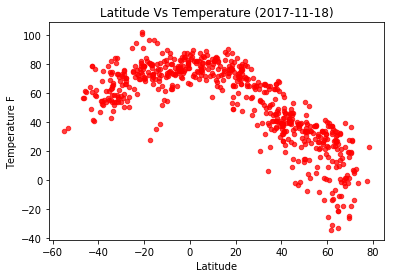

In [9]:
#Plotting scatter plot of latitude Vs Temperature

plt.scatter(summary_data["Latitude"],summary_data["Temperature (F)"], marker="o", facecolors="red",
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.title(f"Latitude Vs Temperature ({date.today()})")
plt.savefig('Lat Vs Temp.png')
plt.show()

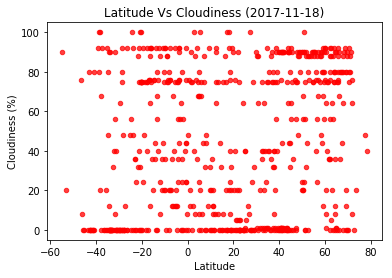

In [6]:
#Plotting scatter plot of latitude Vs Cloudiness

plt.scatter(summary_data["Latitude"],summary_data["Cloudiness (%)"], marker="o", facecolors="red",
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude Vs Cloudiness ({date.today()})")
plt.savefig('Lat Vs Cloudiness.png')
plt.show()

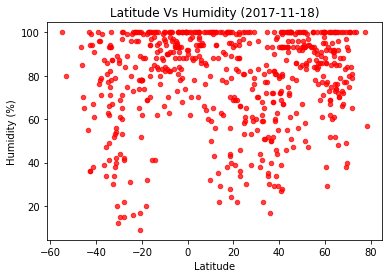

In [7]:
#Plotting scatter plot of latitude Vs Humidity
plt.scatter(summary_data["Latitude"],summary_data["Humidity (%)"], marker="o", facecolors="red", 
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude Vs Humidity ({date.today()})")
plt.savefig('Lat Vs Humidity.png')
plt.show()

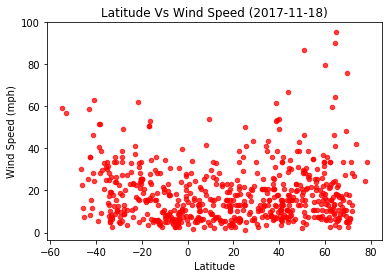

In [8]:
#Plotting scatter plot of latitude Vs WindSpeed

plt.scatter(summary_data["Latitude"],summary_data["Wind Speed (mph)"], marker="o", facecolors="red", 
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude Vs Wind Speed ({date.today()})")
plt.savefig('Lat Vs WindSpeed.png')
plt.show()